[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


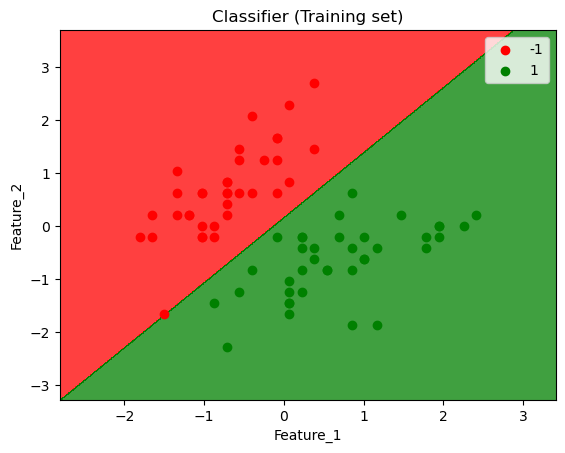

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


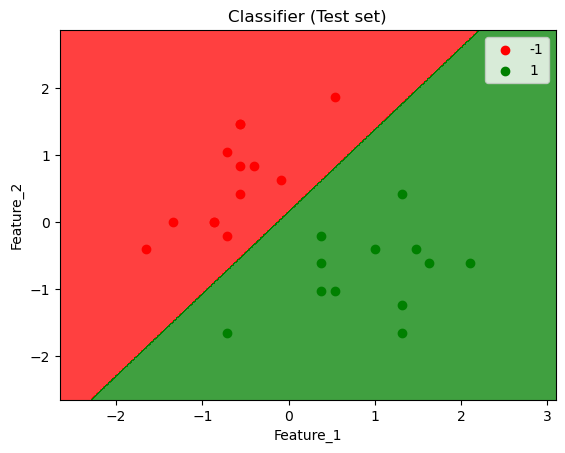

In [2]:
# %load Logistic.py

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('irisdataset.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 4].values
print (X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making and printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Which gives confusion matrix of Test set")
print (cm)

# Calculate loss function of Test set
print ("_")
def MSELoss(y_test:list,y_pred:list):
    x=np.array(y_test)
    y=np.array(y_pred)
    loss=np.sum(np.square(x - y)) / len(y_test)
    return loss
print (MSELoss)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()

[[4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  4.5]
 [5.8 2.7 

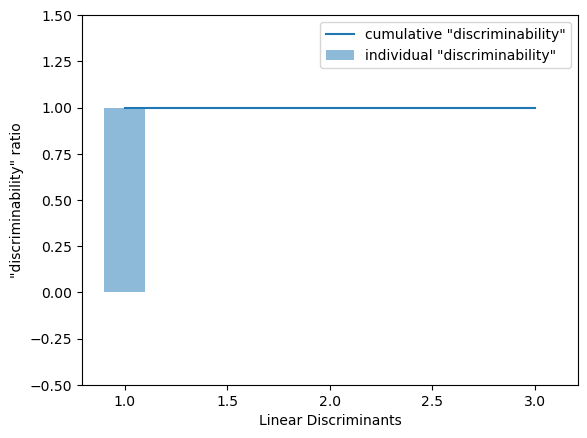

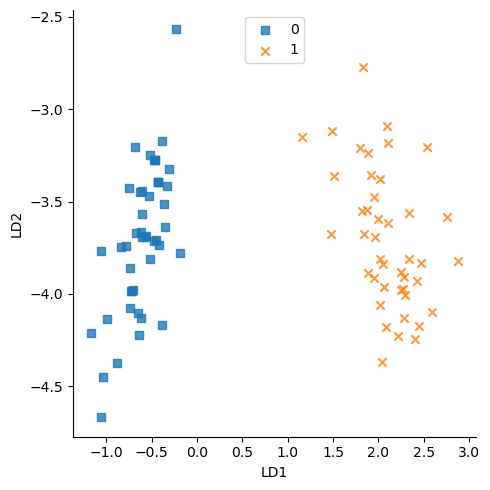

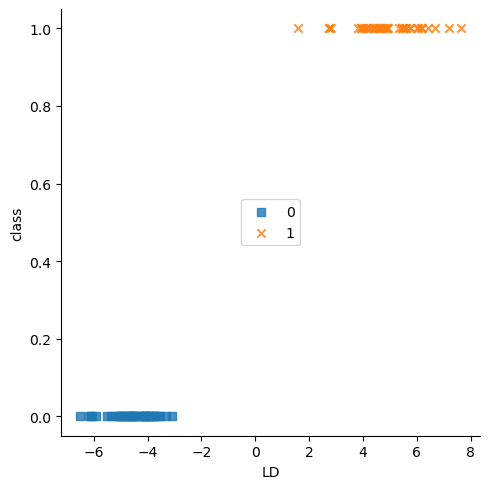

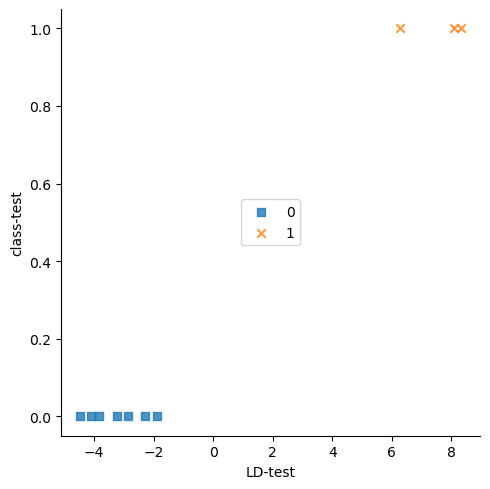

In [4]:
# %load LDA.py
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

#Read irisdataset
# Importing the dataset
dataset = pd.read_csv('irisdataset.csv')
X = dataset.iloc[:, [0, 1, 2]].values
y = dataset.iloc[:, 4].values
y=(y+1)//2
print (X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Construct within-class covariant scatter matrix S_W
S_W = np.zeros((3,3))
for i in range(2):
    S_W += np.cov(X_train [y_train==i].T)
    
#Construct between-class scatter matrix 
N=np.bincount(y_train) 
vecs=[]
[vecs.append(np.mean(X_train[y_train==i],axis=0)) for i in range(2)] 
mean_overall = np.mean(X_train, axis=0) 
S_B=np.zeros((3,3))
for i in range(2):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(3,1)).dot(((vecs[i]-mean_overall).reshape(1,3))))
    
#Calculate sorted eigenvalues and eigenvectors of inverse(S_W).(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])
    
# Visualizing main LDA components
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 4), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 4), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.5, 1.5])
plt.legend(loc='best')
plt.show()

#Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(3,1),eigen_pairs[1][1][:, ].reshape(3,1))).real
X_train_lda = X_train.dot(W)

#Plot transformed features in LDA subspace
data=pd.DataFrame(X_train_lda)
data['class_Training']=y_train
data.columns=["LD1","LD2","class"]
data.head()

markers = ['s', 'x',]
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

#LDA implementation using scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

data=pd.DataFrame(X_train_lda)
data['class']=y_train
data.columns=["LD","class"]
data.head()

markers = ['s', 'x',]
colors = ['r', 'b',]
sns.lmplot(x="LD", y='class', data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='center')
plt.show()

# Plotting Test-set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_test_lda = lda.fit_transform(X_test, y_test)
data=pd.DataFrame(X_test_lda)
data['class-test']=1-y_test
data.columns=["LD-test","class-test"]
data.head()

markers = ['s', 'x',]
colors = ['r', 'b',]
sns.lmplot(x="LD-test", y='class-test', data=data, hue='class-test', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='center')











*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]

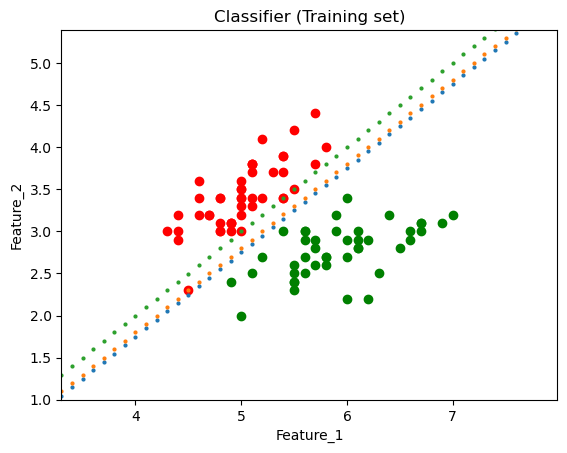

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


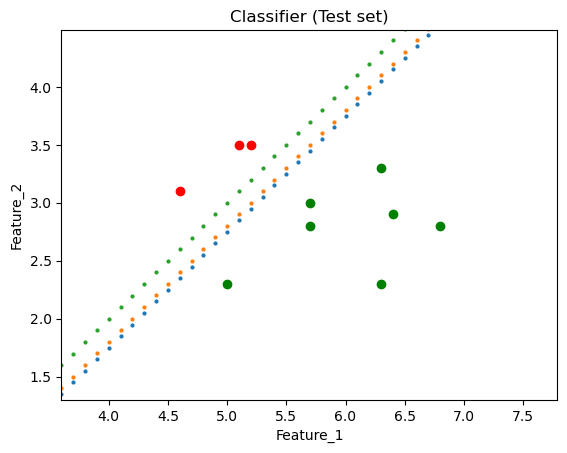

In [6]:
# %load SVM.py
# Importing the libraries

import libsvm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as svm
import seaborn as sns
np.set_printoptions(precision=4)

# Importing the dataset
dataset = pd.read_csv('irisdataset.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 4].values
y=(y+1)//2
print (X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# SVM main function

model = svm.SVC(C=10, kernel='linear')
model.fit(X_train, y_train)


test_pre = model.predict(X_test)
print("test_pre:", test_pre)

Support_vector = model.support_vectors_
print("Support_vector:", Support_vector)

w = model.coef_
print("w:", w)
b = model.intercept_
print("b:", b)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

if w[0, 1] != 0:
    xx = np.arange(0, 10, 0.1)
    yy = -w[0, 0]/w[0, 1] * xx - b/w[0, 1]
    plt.scatter(xx, yy, s=4)
    b1 = Support_vector[0, 1] + w[0, 0]/w[0, 1] * Support_vector[0, 0]
    b2 = Support_vector[1, 1] + w[0, 0]/w[0, 1] * Support_vector[1, 0]
    yy1 = -w[0, 0] / w[0, 1] * xx + b1
    plt.scatter(xx, yy1, s=4)
    yy2 = -w[0, 0] / w[0, 1] * xx + b2
    plt.scatter(xx, yy2, s=4)
else:
    xx = np.ones(100) * (-b) / w[0, 0]
    yy = np.arange(0, 10, 0.1)
    plt.scatter(xx, yy)
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

if w[0, 1] != 0:
    xx = np.arange(0, 10, 0.1)
    yy = -w[0, 0]/w[0, 1] * xx - b/w[0, 1]
    plt.scatter(xx, yy, s=4)
    b1 = Support_vector[0, 1] + w[0, 0]/w[0, 1] * Support_vector[0, 0]
    b2 = Support_vector[1, 1] + w[0, 0]/w[0, 1] * Support_vector[1, 0]
    yy1 = -w[0, 0] / w[0, 1] * xx + b1
    plt.scatter(xx, yy1, s=4)
    yy2 = -w[0, 0] / w[0, 1] * xx + b2
    plt.scatter(xx, yy2, s=4)
else:
    xx = np.ones(100) * (-b) / w[0, 0]
    yy = np.arange(0, 10, 0.1)
    plt.scatter(xx, yy)
plt.show()

